# TFM con la base de datos de Kaggle

## Preprocesado de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import  compute_class_weight

Importación del dataset con pandas.

In [2]:
df = pd.read_excel('ECGCVdata.xlsx')
print(df.head())

   RECORD         hbpermin             Pseg            PQseg           QRSseg  \
0       1  749256689791873  765079365079365  108888888888889  882539682539683   
1       2  685034687809713  724826388888889  961805555555556  939236111111111   
2       3  834886025768087  711538461538462  866096866096866  395299145299145   
3       4  685034687809713           828125  108159722222222  903645833333333   
4       5             8208  707602339181286  102631578947368  101023391812866   

             QRseg            QTseg            RSseg            STseg  \
0  435714285714286  193015873015873  446825396825397  104761904761905   
1  462673611111111  193489583333333          4765625  995659722222222   
2  185897435897436  132478632478632  209401709401709  929487179487179   
3  452256944444444  188802083333333  451388888888889           984375   
4  494152046783626  193713450292398  516081871345029  926900584795322   

              Tseg  ...            RMSSD          QRSarea          QRSperi

Análisis exploratorio de los datos.

In [3]:
# Dimensiones del dataset
print(df.shape)

(1200, 56)


In [4]:
# Tipo de datos de cada columna
print(df.dtypes)

RECORD          int64
hbpermin        int64
Pseg            int64
PQseg           int64
QRSseg          int64
QRseg           int64
QTseg           int64
RSseg           int64
STseg           int64
Tseg            int64
PTseg           int64
ECGseg          int64
QRtoQSdur     float64
RStoQSdur     float64
RRmean          int64
PPmean          int64
PQdis           int64
PonQdis         int64
PRdis           int64
PonRdis         int64
PSdis           int64
PonSdis         int64
PTdis           int64
PonTdis         int64
PToffdis        int64
QRdis           int64
QSdis           int64
QTdis           int64
QToffdis        int64
RSdis           int64
RTdis           int64
RToffdis        int64
STdis           int64
SToffdis        int64
PonToffdis      int64
PonPQang      float64
PQRang        float64
QRSang        float64
RSTang        float64
STToffang     float64
RRTot           int64
NNTot           int64
SDRR            int64
IBIM            int64
IBISD           int64
SDSD      

In [5]:
# Visualización de las 10 primeras y últimas filas
print('10 PRIMERAS FILAS')
print(df.head(10))
print('10 ÚLTIMAS FILAS')
print(df.tail(10))

10 PRIMERAS FILAS
   RECORD         hbpermin             Pseg            PQseg           QRSseg  \
0       1  749256689791873  765079365079365  108888888888889  882539682539683   
1       2  685034687809713  724826388888889  961805555555556  939236111111111   
2       3  834886025768087  711538461538462  866096866096866  395299145299145   
3       4  685034687809713           828125  108159722222222  903645833333333   
4       5             8208  707602339181286  102631578947368  101023391812866   
5       6             6696  702508960573477  619175627240143  909498207885305   
6       7             6912  852430555555556  986111111111111  113368055555556   
7       8  599405351833499  700396825396825  564484126984127  337301587301587   
8       9  941922695738355  554924242424242  930555555555556  111237373737374   
9      10  687761194029851  460069444444444  861111111111111  112760416666667   

             QRseg            QTseg            RSseg            STseg  \
0  43571428571428

In [6]:
# Valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print(columnas_con_nulos)

['QRtoQSdur', 'RStoQSdur', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang', 'QRslope', 'RSslope']


In [7]:
# NAs
columnas_con_nulos = df.columns[df.isna().any()].tolist()
print(columnas_con_nulos)

['QRtoQSdur', 'RStoQSdur', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang', 'QRslope', 'RSslope']


In [8]:
# Eliminación de las variables con valores nulos y Nas y la de RECORD con el ID que no aporta ninguna información al análisis
df = df.drop(columns=['RECORD','QRtoQSdur', 'RStoQSdur', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang', 'QRslope', 'RSslope'])

In [9]:
# Valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print(columnas_con_nulos)

[]


In [10]:
# NAs
columnas_con_nulos = df.columns[df.isna().any()].tolist()
print(columnas_con_nulos)

[]


In [11]:
# Descriptiva de los datos
print(df.describe())

           hbpermin          Pseg         PQseg        QRSseg         QRseg  \
count  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03   
mean   3.347462e+14  5.520932e+14  5.551111e+14  4.611057e+14  3.334631e+14   
std    3.757492e+14  1.903878e+14  3.143322e+14  3.262244e+14  2.303117e+14   
min    1.800000e+01  5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    9.150000e+02  5.130814e+14  1.251383e+14  1.519482e+14  1.451352e+14   
50%    1.041667e+14  5.943391e+14  6.146027e+14  4.141364e+14  3.474775e+14   
75%    7.142857e+14  6.597038e+14  8.023917e+14  7.962267e+14  4.563889e+14   
max    9.980952e+14  9.531746e+14  9.990476e+14  9.979747e+14  9.976774e+14   

              QTseg         RSseg         STseg          Tseg         PTseg  \
count  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03   
mean   1.293405e+14  3.308537e+14  5.473875e+14  4.603633e+14  1.982944e+14   
std    4.812448e+13  2.203645e+14  4.025894e+14  3.

In [12]:
# Nombres de las variables
print(df.columns)

Index(['hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg', 'RSseg',
       'STseg', 'Tseg', 'PTseg', 'ECGseg', 'RRmean', 'PPmean', 'PQdis',
       'PonQdis', 'PRdis', 'PonRdis', 'PSdis', 'PonSdis', 'PTdis', 'PonTdis',
       'PToffdis', 'QRdis', 'QSdis', 'QTdis', 'QToffdis', 'RSdis', 'RTdis',
       'RToffdis', 'STdis', 'SToffdis', 'PonToffdis', 'RRTot', 'NNTot', 'SDRR',
       'IBIM', 'IBISD', 'SDSD', 'RMSSD', 'QRSarea', 'QRSperi', 'PQslope',
       'STslope', 'NN50', 'pNN50', 'ECG_signal'],
      dtype='object')


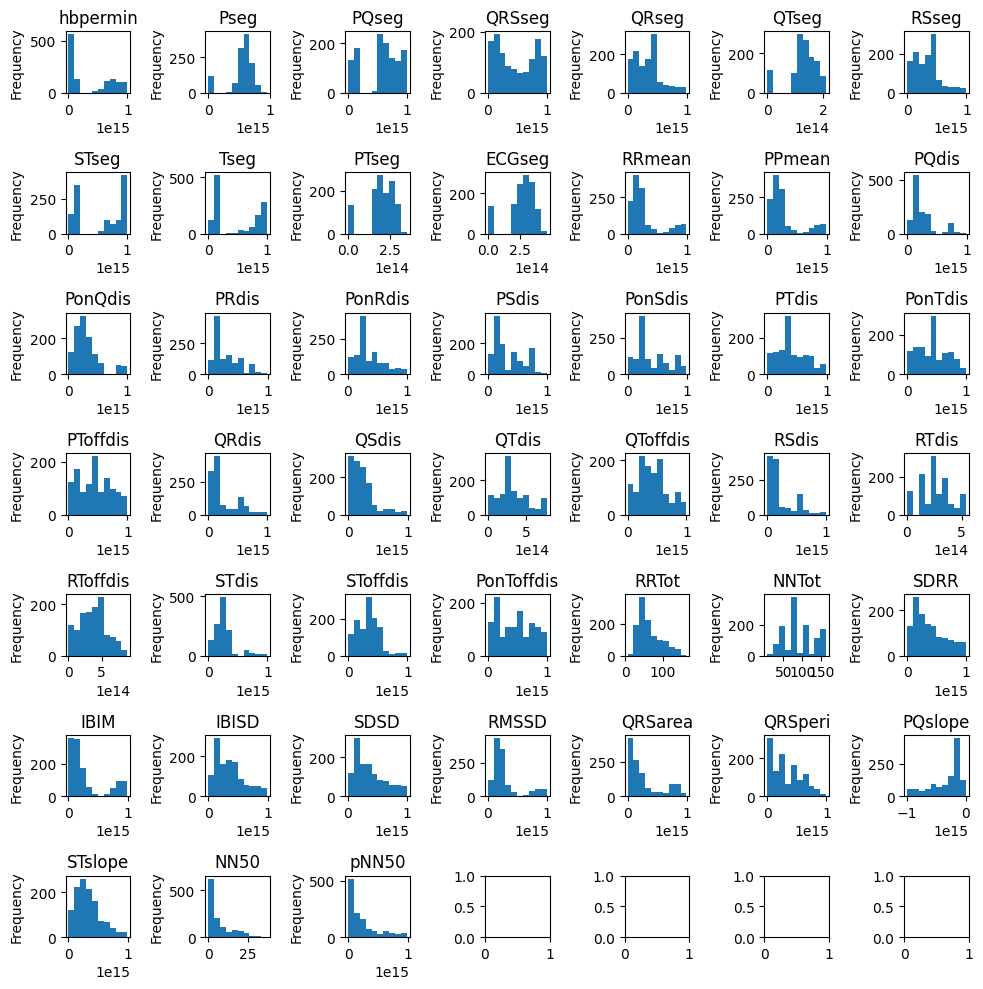

In [13]:
# Histograma para cada variable de las señales
fig, ax = plt.subplots(ncols=7, nrows=7, figsize = (10,10))
ax = ax.flatten()
df['hbpermin'].plot(kind='hist', title='hbpermin',ax=ax[0])
df['Pseg'].plot(kind='hist', title='Pseg',ax=ax[1])
df['PQseg'].plot(kind='hist', title='PQseg',ax=ax[2])
df['QRSseg'].plot(kind='hist', title='QRSseg',ax=ax[3])
df['QRseg'].plot(kind='hist', title='QRseg',ax=ax[4])
df['QTseg'].plot(kind='hist', title='QTseg',ax=ax[5])
df['RSseg'].plot(kind='hist', title='RSseg',ax=ax[6])
df['STseg'].plot(kind='hist', title='STseg',ax=ax[7])
df['Tseg'].plot(kind='hist', title='Tseg',ax=ax[8])
df['PTseg'].plot(kind='hist', title='PTseg',ax=ax[9])
df['ECGseg'].plot(kind='hist', title='ECGseg',ax=ax[10])
df['RRmean'].plot(kind='hist', title='RRmean',ax=ax[11])
df['PPmean'].plot(kind='hist', title='PPmean',ax=ax[12])
df['PQdis'].plot(kind='hist', title='PQdis',ax=ax[13])
df['PonQdis'].plot(kind='hist', title='PonQdis',ax=ax[14])
df['PRdis'].plot(kind='hist', title='PRdis',ax=ax[15])
df['PonRdis'].plot(kind='hist', title='PonRdis',ax=ax[16])
df['PSdis'].plot(kind='hist', title='PSdis',ax=ax[17])
df['PonSdis'].plot(kind='hist', title='PonSdis',ax=ax[18])
df['PTdis'].plot(kind='hist', title='PTdis',ax=ax[19])
df['PonTdis'].plot(kind='hist', title='PonTdis',ax=ax[20])
df['PToffdis'].plot(kind='hist', title='PToffdis',ax=ax[21])
df['QRdis'].plot(kind='hist', title='QRdis',ax=ax[22])
df['QSdis'].plot(kind='hist', title='QSdis',ax=ax[23])
df['QTdis'].plot(kind='hist', title='QTdis',ax=ax[24])
df['QToffdis'].plot(kind='hist', title='QToffdis',ax=ax[25])
df['RSdis'].plot(kind='hist', title='RSdis',ax=ax[26])
df['RTdis'].plot(kind='hist', title='RTdis',ax=ax[27])
df['RToffdis'].plot(kind='hist', title='RToffdis',ax=ax[28])
df['STdis'].plot(kind='hist', title='STdis',ax=ax[29])
df['SToffdis'].plot(kind='hist', title='SToffdis',ax=ax[30])
df['PonToffdis'].plot(kind='hist', title='PonToffdis',ax=ax[31])
df['RRTot'].plot(kind='hist', title='RRTot',ax=ax[32])
df['NNTot'].plot(kind='hist', title='NNTot',ax=ax[33])
df['SDRR'].plot(kind='hist', title='SDRR',ax=ax[34])
df['IBIM'].plot(kind='hist', title='IBIM',ax=ax[35])
df['IBISD'].plot(kind='hist', title='IBISD',ax=ax[36])
df['SDSD'].plot(kind='hist', title='SDSD',ax=ax[37])
df['RMSSD'].plot(kind='hist', title='RMSSD',ax=ax[38])
df['QRSarea'].plot(kind='hist', title='QRSarea',ax=ax[39])
df['QRSperi'].plot(kind='hist', title='QRSperi',ax=ax[40])
df['PQslope'].plot(kind='hist', title='PQslope',ax=ax[41])
df['STslope'].plot(kind='hist', title='STslope',ax=ax[42])
df['NN50'].plot(kind='hist', title='NN50',ax=ax[43])
df['pNN50'].plot(kind='hist', title='pNN50',ax=ax[44])
plt.tight_layout()
plt.show()

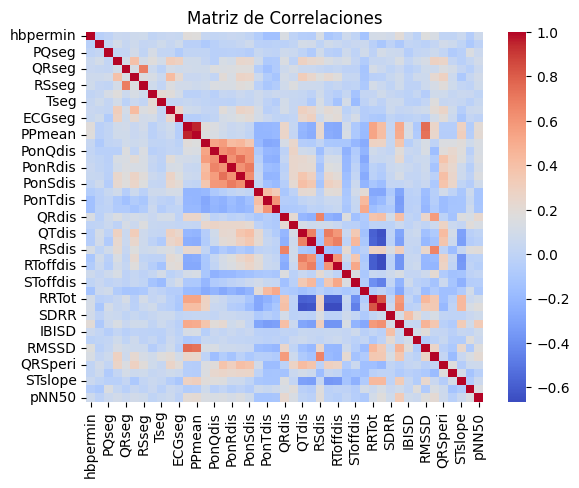

In [14]:
# selección de las variables numércias
df_numerico = df.iloc[:,:-1]


# Matriz de correlaciones
matriz_correlaciones = df_numerico.corr()
plt.figure()
sns.heatmap(matriz_correlaciones, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

Categorización de la variable categórica.

In [15]:
print(df['ECG_signal'].unique())

['ARR' 'AFF' 'CHF' 'NSR']


In [16]:
# Categorizador
categorizador = LabelEncoder()
# Aplicar a las variables categóricas
df['ECG_signal'] = categorizador.fit_transform(df['ECG_signal'])

In [17]:
print(df['ECG_signal'].unique())

[1 0 2 3]


Antes de proceder con los análisis, se va a proceder a almacenar las variables independientes numéricas en la variable X, y la dependiente categórica en Y. 
Además de realizar las divisiones en conjuntos de entrenamiento y test.

In [18]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

División en conjuntos de entrenamiento y test.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state= 0)

Escalado de las variables.

In [20]:
# Normaliazción de los datos
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

Creación de las funciones para obtener las métricas de sensibilidad y especificidad.

In [21]:
# Funciones para el cálculo de la Sensibilidad y Especificidad para cualquier matriz
# VP (Verdaderos positivos)
def VP(matriz_confusion):
    diagonal = []
    for elemento in range(len(matriz_confusion)):
        diagonal.append(matriz_confusion[elemento][elemento])
    return sum(diagonal)

# FN (falsos negativos)
def FN(matriz_confusion):
    fuera_diagonal = []
    for fila in range(len(matriz_confusion)):
        for columna in range(len(matriz_confusion)):
            if fila != columna:
                fuera_diagonal.append(matriz_confusion[fila][columna])
    return sum(fuera_diagonal)

# FP (falsos positivos)
def FP(matriz_confusion):
    fuera_diagonal = []
    for fila in range(len(matriz_confusion)):
        for columna in range(len(matriz_confusion)):
            if fila != columna:
                fuera_diagonal.append(matriz_confusion[fila][columna])
    return sum(fuera_diagonal)

# VN (verdaderos negativos)
def VN(matriz_confusion):
    VN = []
    i = 0
    while i < len(matriz_confusion):
        for fila in range(len(matriz_confusion)):
            for columna in range(len(matriz_confusion)):
                if  fila != i and columna != i:
                    VN.append(matriz_confusion[fila][columna])
        i += 1
    return sum(VN)

# Sensibilidad 
def Sensibilidad(matriz_confusion):
    return VP(matriz_confusion) / (VP(matriz_confusion) + FN(matriz_confusion))

# Especificidad
def Especificidad(matriz_confusion):
    return VN(matriz_confusion) / (VN(matriz_confusion) + FP(matriz_confusion))

## Random Forest

In [22]:
clasificador = RandomForestClassifier(n_estimators=100,criterion = 'entropy',random_state = 0)
clasificador.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

Obtención de las métricas de evaluación del modelo.

In [23]:
# Predicción 
y_prediccion = clasificador.predict(X_test)

# Accuracy
Accuracy_Random_Forest = accuracy_score(Y_test, y_prediccion)
print(f'Accuracy del Random Forest: {Accuracy_Random_Forest}')

# Matriz de confusión
Matriz_Confusion_Random_Forest = confusion_matrix(Y_test, y_prediccion)
print('Matriz de confusión del Random Forest:')
print(Matriz_Confusion_Random_Forest)

# Precisión
Precision = precision_score(Y_test, y_prediccion, average='weighted')
print(f'Precisión del Random Forest: {Precision}')

# Recall
Recall = recall_score(Y_test, y_prediccion, average='weighted')
print(f'Recall del Random Forest: {Recall}')

# F1 Score
F1 = f1_score(Y_test, y_prediccion, average='weighted')
print(f'F1 del Random Forest: {F1}')

# Sensibilidad
sensibilidad = Sensibilidad(Matriz_Confusion_Random_Forest)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(Matriz_Confusion_Random_Forest)
print(f'Especificidad: {round(especificidad,4)}')

Accuracy del Random Forest: 0.9733333333333334
Matriz de confusión del Random Forest:
[[72  0  5  0]
 [ 0 63  0  0]
 [ 3  0 74  0]
 [ 0  0  0 83]]
Precisión del Random Forest: 0.9734886075949367
Recall del Random Forest: 0.9733333333333334
F1 del Random Forest: 0.9733288349077823
Sensibilidad: 0.9733
Especificidad: 0.9911


## Selección de las variables

In [24]:
significacion_variables = clasificador.feature_importances_
nombres_variables = X.columns.tolist()

In [25]:
# Bucle para eliminar variables con importancia mayor a 0.05
while max(significacion_variables) >= 0.05 and len(X.columns) > 0:
    # Obtener el índice de la variable con mayor importancia
    indice_max = significacion_variables.argmax()
    
    # Imprimir el nombre de la variable antes de eliminarla
    print(f"Eliminando la variable: {X.columns[indice_max]}")
    
    # Eliminar la variable del DataFrame
    X = X.drop(columns=[X.columns[indice_max]])
    
    # Verificar que el DataFrame no esté vacío antes de entrenar el modelo
    if len(X.columns) == 0:
        print("No quedan variables para entrenar el modelo.")
        break
    
    # Entrenar el modelo nuevamente con las variables restantes
    clasificador.fit(X,Y)
    
    # Obtener la nueva importancia de las variables
    significacion_variables = clasificador.feature_importances_

# Crear el gráfico de barras horizontales con las variables restantes
if len(X.columns) > 0:
    plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
    plt.barh(X.columns, significacion_variables, color='green')
    plt.axvline(x=0.05, color='red', linestyle='--')  # Agregar la línea vertical en el valor 0.05
    plt.xlabel('Significación')
    plt.title('Significación de las variables - Random Forest')
    plt.tight_layout()  # Ajustar el espaciado para evitar que se junten
    plt.show()
else:
    print("No hay variables con importancia menor a 0.05 para graficar.")

Eliminando la variable: NNTot
Eliminando la variable: RRTot
Eliminando la variable: IBIM
Eliminando la variable: QTdis
Eliminando la variable: RTdis
Eliminando la variable: RToffdis
Eliminando la variable: PonTdis
Eliminando la variable: QToffdis
Eliminando la variable: STdis
Eliminando la variable: SToffdis
Eliminando la variable: PTdis
Eliminando la variable: PonToffdis
Eliminando la variable: PToffdis
Eliminando la variable: RMSSD
Eliminando la variable: RRmean
Eliminando la variable: PPmean
Eliminando la variable: PQdis
Eliminando la variable: PonQdis
Eliminando la variable: PRdis
Eliminando la variable: PonRdis
Eliminando la variable: PonSdis
Eliminando la variable: PSdis
Eliminando la variable: STslope
Eliminando la variable: hbpermin
Eliminando la variable: QRdis
Eliminando la variable: pNN50
Eliminando la variable: Pseg
Eliminando la variable: QRSperi
Eliminando la variable: QSdis
Eliminando la variable: RSdis
Eliminando la variable: QRSarea
Eliminando la variable: PQslope
Elim

Se decidió mantener todas las variables iniciales, debido a que, la eliminación de la menos significativa tiene un impacto lo suficientemente grande como para no eliminarla del modelo, ya que el modelo termina perdiendo todas las variables. Además, la evaluación del modelo que contiene todas las variables entrenado con el Random Forest, tiene una precisión de prácticamente 1, por lo que es muy bueno. Por lo que se procederá a realizar los análisis con todas las variables.

In [26]:
# Importar la base de datos nuevamente
df = pd.read_excel('ECGCVdata.xlsx')
print(df.head())

# Valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print(columnas_con_nulos)

# NAs
columnas_con_nulos = df.columns[df.isna().any()].tolist()
print(columnas_con_nulos)

# Eliminación de las variables con valores nulos y Nas y la de RECORD con el ID que no aporta ninguna información al análisis
df = df.drop(columns=['RECORD','QRtoQSdur', 'RStoQSdur', 'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang', 'QRslope', 'RSslope'])

# Valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print(columnas_con_nulos)

# NAs
columnas_con_nulos = df.columns[df.isna().any()].tolist()
print(columnas_con_nulos)

# Categorización de la variable categórica
print(df['ECG_signal'].unique())
# Categorizador
categorizador = LabelEncoder()
# Aplicar a las variables categóricas
df['ECG_signal'] = categorizador.fit_transform(df['ECG_signal'])
print(df['ECG_signal'].unique())


# División en X e Y
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

# División en conjuntos de entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state= 0)

# Normaliazción de los datos
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

   RECORD         hbpermin             Pseg            PQseg           QRSseg  \
0       1  749256689791873  765079365079365  108888888888889  882539682539683   
1       2  685034687809713  724826388888889  961805555555556  939236111111111   
2       3  834886025768087  711538461538462  866096866096866  395299145299145   
3       4  685034687809713           828125  108159722222222  903645833333333   
4       5             8208  707602339181286  102631578947368  101023391812866   

             QRseg            QTseg            RSseg            STseg  \
0  435714285714286  193015873015873  446825396825397  104761904761905   
1  462673611111111  193489583333333          4765625  995659722222222   
2  185897435897436  132478632478632  209401709401709  929487179487179   
3  452256944444444  188802083333333  451388888888889           984375   
4  494152046783626  193713450292398  516081871345029  926900584795322   

              Tseg  ...            RMSSD          QRSarea          QRSperi

## Regresión Logística

In [27]:
clasificador = LogisticRegression(random_state=0,multi_class='multinomial')
clasificador.fit(X_train,Y_train)

c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=0)

In [28]:
# Predicción 
y_prediccion = clasificador.predict(X_test)

# Accuracy
Accuracy_Regresion_Logistica = accuracy_score(Y_test, y_prediccion)
print(f'Accuracy de la Regresión Logística: {Accuracy_Regresion_Logistica}')

# Matriz de confusión
Matriz_Confusion_Regresion_Logistica = confusion_matrix(Y_test, y_prediccion)
print('Matriz de confusión de la Regresión Logística:')
print(Matriz_Confusion_Regresion_Logistica)

# Precisión
Precision = precision_score(Y_test, y_prediccion, average='weighted')
print(f'Precisión de la Regresión Logística: {Precision}')

# Recall
Recall = recall_score(Y_test, y_prediccion, average='weighted')
print(f'Recall de la Regresión Logística: {Recall}')

# F1 Score
F1 = f1_score(Y_test, y_prediccion, average='weighted')
print(f'F1 de la Regresión Logística: {F1}')

# Sensibilidad
sensibilidad = Sensibilidad(Matriz_Confusion_Regresion_Logistica)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(Matriz_Confusion_Regresion_Logistica)
print(f'Especificidad: {round(especificidad,4)}')

Accuracy de la Regresión Logística: 0.9366666666666666
Matriz de confusión de la Regresión Logística:
[[70  0  7  0]
 [ 0 59  4  0]
 [ 6  0 71  0]
 [ 2  0  0 81]]
Precisión de la Regresión Logística: 0.9392443193662706
Recall de la Regresión Logística: 0.9366666666666666
F1 de la Regresión Logística: 0.9374597126727182
Sensibilidad: 0.9367
Especificidad: 0.9789


## LSTM básica

Crear el número de pasos temporales. Se iniciará en 5 para realizar el primer entrenamiento de la red y observar los resultados que devuelve.

In [29]:
ventana = 5
x = []
y = []
for i in range(ventana,len(X)):
  x.append(X[i-ventana:i,:])
  y.append(Y[i])

# Conversión de x e y en arrays de numpy para que la red neuronal los coja correctamente.
x,y = np.array(x), np.array(y)

# Categorizar la variable objetivo
y = to_categorical(y, num_classes=4)

# División en conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 0)

Creación de la red neuronal

In [30]:
red = Sequential()

# Primera capa
red.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
red.add(Dropout(0.1))

# Segunda capa
red.add(LSTM(units = 100, return_sequences = False))
red.add(Dropout(0.1))
red.add(Dense(units = 4,activation = 'softmax'))

# Compilación de la red
red.compile(optimizer = 'adam',loss='CategoricalCrossentropy',metrics = ['accuracy'])

# Entrenamiento de la red
red.fit(x_train,y_train,epochs = 100, batch_size = 32)

# Predicción
y_pred = red.predict(x_test)


# Evaluación del modelo
perdida, accuracy = red.evaluate(x_test,y_test)
print(f'Pérdida del conjunto de test: {perdida}')
print(f'Accuracy del conjunto de test: {accuracy}')

Epoch 1/100


c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3734 - loss: 1.2755
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8002 - loss: 0.5898
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8706 - loss: 0.3568
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8976 - loss: 0.2790
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9179 - loss: 0.2265
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9186 - loss: 0.2013
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9416 - loss: 0.1733
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9283 - loss: 0.1961
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9631 - loss: 0.1279
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9625 - loss: 0.1162
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9769 - loss: 0.0906
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9787 - lo

In [31]:
# Matriz de confusión
# Discretizaar los valores por filas
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

# Sensibilidad
sensibilidad = Sensibilidad(matriz_confusion)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(matriz_confusion)
print(f'Especificidad: {round(especificidad,4)}')

Matriz de confusión:
[[60  7 12  1]
 [ 0 62  0  0]
 [ 1  1 74  0]
 [ 0  0  2 79]]
Sensibilidad: 0.9197
Especificidad: 0.9732


## LSTM aumentando las ventanas

Crear el número de pasos temporales. Se iniciará en 5 para realizar el primer entrenamiento de la red y observar los resultados que devuelve.

En este caso, se aumentará el tamaño de la ventana a 10.

In [32]:
ventana = 10
x = []
y = []
for i in range(ventana,len(X)):
  x.append(X[i-ventana:i,:])
  y.append(Y[i])

# Conversión de x e y en arrays de numpy para que la red neuronal los coja correctamente.
x,y = np.array(x), np.array(y)

# Categorizar la variable objetivo
y = to_categorical(y, num_classes=4)

# División en conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 0)

Creación de la red neuronal

In [33]:
red = Sequential()

# Primera capa
red.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
red.add(Dropout(0.1))

# Segunda capa
red.add(LSTM(units = 100, return_sequences = False))
red.add(Dropout(0.1))
red.add(Dense(units = 4,activation = 'softmax'))

# Compilación de la red
red.compile(optimizer = 'adam',loss='CategoricalCrossentropy',metrics = ['accuracy'])

# Entrenamiento de la red
red.fit(x_train,y_train,epochs = 100, batch_size = 32)

# Predicción
y_pred = red.predict(x_test)

# Evaluación del modelo
perdida, accuracy = red.evaluate(x_test,y_test)
print(f'Pérdida del conjunto de test: {perdida}')
print('Accuracy del conjunto de test: ',accuracy)

Epoch 1/100


c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5954 - loss: 1.1021
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9105 - loss: 0.2737
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9628 - loss: 0.1137
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9839 - loss: 0.0683
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9843 - loss: 0.0503
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9959 - loss: 0.0242
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9965 - loss: 0.0241
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9915 - loss: 0.0267
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9974 - loss: 0.0136
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0105
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9982 - loss: 0.0053
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - lo

In [34]:
# Matriz de confusión
# Discretizaar los valores por filas
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

# Sensibilidad
sensibilidad = Sensibilidad(matriz_confusion)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(matriz_confusion)
print(f'Especificidad: {round(especificidad,4)}')

Matriz de confusión:
[[76  0  1  0]
 [ 0 62  0  0]
 [ 0  0 81  0]
 [ 0  0  1 77]]
Sensibilidad: 0.9933
Especificidad: 0.9978


## LSTM aumentando ventanas y epochs

In [35]:
ventana = 10
x = []
y = []
for i in range(ventana,len(X)):
  x.append(X[i-ventana:i,:])
  y.append(Y[i])

# Conversión de x e y en arrays de numpy para que la red neuronal los coja correctamente.
x,y = np.array(x), np.array(y)

# Categorizar la variable objetivo
y = to_categorical(y, num_classes=4)

# División en conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 0)

In [36]:
red = Sequential()

# Primera capa
red.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
red.add(Dropout(0.1))

# Segunda capa
red.add(LSTM(units = 100, return_sequences = False))
red.add(Dropout(0.1))
red.add(Dense(units = 4,activation = 'softmax'))

# Compilación de la red
red.compile(optimizer = 'adam',loss='CategoricalCrossentropy',metrics = ['accuracy'])

# Entrenamiento de la red
red.fit(x_train,y_train,epochs = 200, batch_size = 40)

# Predicción
y_pred = red.predict(x_test)

# Evaluación del modelo
perdida, accuracy = red.evaluate(x_test,y_test)
print(f'Pérdida del conjunto de test: {perdida}')
print('Accuracy del conjunto de test: ',accuracy)

Epoch 1/200


c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5798 - loss: 1.1541
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9377 - loss: 0.2980
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9598 - loss: 0.1340
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9319 - loss: 0.1490
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9798 - loss: 0.0708
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9907 - loss: 0.0468
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9887 - loss: 0.0360
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9910 - loss: 0.0298
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9827 - loss: 0.0423
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9921 - loss: 0.0381
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9908 - loss: 0.0210
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9990 - lo

In [37]:
# Matriz de confusión
# Discretizaar los valores por filas
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

# Sensibilidad
sensibilidad = Sensibilidad(matriz_confusion)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(matriz_confusion)
print(f'Especificidad: {round(especificidad,4)}')

Matriz de confusión:
[[76  0  1  0]
 [ 0 62  0  0]
 [ 0  0 81  0]
 [ 0  0  0 78]]
Sensibilidad: 0.9966
Especificidad: 0.9989


Aumentando las epochs no mejora por lo que se dejarán las 100 epochs.

## LSTM con 10 ventanas, 100 epochs y EarlyStopping

In [38]:
ventana = 10
x = []
y = []
for i in range(ventana,len(X)):
  x.append(X[i-ventana:i,:])
  y.append(Y[i])

# Conversión de x e y en arrays de numpy para que la red neuronal los coja correctamente.
x,y = np.array(x), np.array(y)

# Categorizar la variable objetivo
y = to_categorical(y, num_classes=4)

# División en conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 0)

Epoch 1/100


c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5738 - loss: 1.0669 - val_accuracy: 0.9295 - val_loss: 0.3283
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9073 - loss: 0.3084 - val_accuracy: 0.9698 - val_loss: 0.1087
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9565 - loss: 0.1522 - val_accuracy: 0.9832 - val_loss: 0.0705
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9734 - loss: 0.0828 - val_accuracy: 0.9832 - val_loss: 0.0494
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9878 - loss: 0.0506 - val_accuracy: 0.9966 - val_loss: 0.0273
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9848 - loss: 0.0441 - val_accuracy: 0.9899 - val_loss: 0.0262
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9963 - loss: 0.0235 - val_accuracy: 0.9933 - val_loss: 0.0210
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9994 - loss: 0.0147 - val_accuracy: 0.9966 - val_l

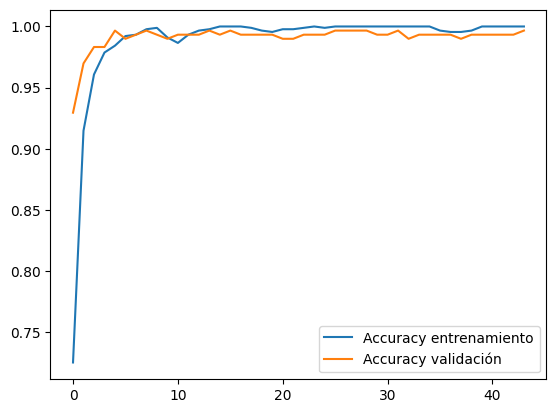

In [39]:
red = Sequential()

# Primera capa
red.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
red.add(Dropout(0.1))

# Segunda capa
red.add(LSTM(units = 100, return_sequences = False))
red.add(Dropout(0.1))
red.add(Dense(units = 4,activation = 'softmax'))

# Compilación de la red
red.compile(optimizer = 'adam',loss='CategoricalCrossentropy',metrics = ['accuracy'])

# Optimización del modelo
Early_Stopping = EarlyStopping(monitor='val_loss',patience=15, verbose=1,restore_best_weights=True)

# Entrenamiento de la red
historial = red.fit(x_train,y_train,epochs = 100, batch_size = 32, validation_data=(x_test,y_test),callbacks = [Early_Stopping])

# Predicción
y_pred = red.predict(x_test)

# Evaluación del modelo
perdida, accuracy = red.evaluate(x_test,y_test)
print(f'Pérdida del conjunto de test: {perdida}')
print(f'Accuracy del conjunto de test: {accuracy}')

# Visualización de los resultados
plt.plot(historial.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Accuracy validación')
plt.legend()
plt.show()

In [40]:
# Matriz de confusión
# Discretizaar los valores por filas
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

# Sensibilidad
sensibilidad = Sensibilidad(matriz_confusion)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(matriz_confusion)
print(f'Especificidad: {round(especificidad,4)}')

Matriz de confusión:
[[76  0  1  0]
 [ 0 62  0  0]
 [ 0  0 81  0]
 [ 0  0  0 78]]
Sensibilidad: 0.9966
Especificidad: 0.9989


## LSTM con 10 ventanas y aumento de capas LSTM

In [41]:
ventana = 10
x = []
y = []
for i in range(ventana,len(X)):
  x.append(X[i-ventana:i,:])
  y.append(Y[i])

# Conversión de x e y en arrays de numpy para que la red neuronal los coja correctamente.
x,y = np.array(x), np.array(y)

# Categorizar la variable objetivo
y = to_categorical(y, num_classes=4)

# División en conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 0)

Epoch 1/100


c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5718 - loss: 1.1301 - val_accuracy: 0.7685 - val_loss: 0.5094
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8540 - loss: 0.3654 - val_accuracy: 0.9195 - val_loss: 0.1837
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9613 - loss: 0.1430 - val_accuracy: 0.9161 - val_loss: 0.1697
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9629 - loss: 0.1238 - val_accuracy: 0.9664 - val_loss: 0.0875
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9723 - loss: 0.0757 - val_accuracy: 0.9799 - val_loss: 0.0612
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9786 - loss: 0.0583 - val_accuracy: 0.9832 - val_loss: 0.0419
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9819 - loss: 0.0505 - val_accuracy: 0.9899 - val_loss: 0.0328
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9947 - loss: 0.0185 - val_accuracy: 0.9933 - val_l

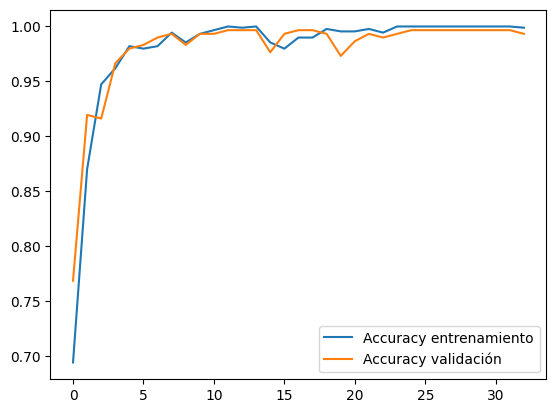

In [42]:
red = Sequential()

# Primera capa
red.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
red.add(Dropout(0.1))

# Segunda capa
red.add(LSTM(units = 100, return_sequences = True))
red.add(Dropout(0.1))

# Tercera capa
red.add(LSTM(units = 100, return_sequences = True))
red.add(Dropout(0.1))

# Cuarta capa
red.add(LSTM(units = 100, return_sequences = False))
red.add(Dropout(0.1))
red.add(Dense(units = 4,activation = 'softmax'))

# Compilación de la red
red.compile(optimizer = 'adam',loss='CategoricalCrossentropy',metrics = ['accuracy'])

# Optimización del modelo
Early_Stopping = EarlyStopping(monitor='val_loss',patience=15, verbose=1,restore_best_weights=True)

# Entrenamiento de la red
historial = red.fit(x_train,y_train,epochs = 100, batch_size = 40, validation_data=(x_test,y_test),callbacks = [Early_Stopping])

# Predicción
y_pred = red.predict(x_test)

# Evaluación del modelo
perdida, accuracy = red.evaluate(x_test,y_test)
print(f'Pérdida del conjunto de test: {perdida}')
print(f'Accuracy del conjunto de test: {accuracy}')

# Visualización de los resultados
plt.plot(historial.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Accuracy validación')
plt.legend()
plt.show()

In [43]:
# Matriz de confusión
# Discretizaar los valores por filas
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

# Sensibilidad
sensibilidad = Sensibilidad(matriz_confusion)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(matriz_confusion)
print(f'Especificidad: {round(especificidad,4)}')

Matriz de confusión:
[[76  0  1  0]
 [ 0 62  0  0]
 [ 0  0 81  0]
 [ 0  0  0 78]]
Sensibilidad: 0.9966
Especificidad: 0.9989


Aumentando el número de capas, el accuracy no mejora, por lo que nos quedaremos con 3.

## LSTM con 10 ventanas y 100 epochs + CNN

In [44]:
ventana = 10
x = []
y = []
for i in range(ventana,len(X)):
  x.append(X[i-ventana:i,:])
  y.append(Y[i])

# Conversión de x e y en arrays de numpy para que la red neuronal los coja correctamente.
x,y = np.array(x), np.array(y)

# Categorizar la variable objetivo
y = to_categorical(y, num_classes=4)

# División en conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 0)

Epoch 1/100


c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3459 - loss: 1.4459 - val_accuracy: 0.4094 - val_loss: 1.3178
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3738 - loss: 1.3188 - val_accuracy: 0.4295 - val_loss: 1.2533
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3951 - loss: 1.3030 - val_accuracy: 0.4664 - val_loss: 1.2015
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4619 - loss: 1.1845 - val_accuracy: 0.5000 - val_loss: 1.1569
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4927 - loss: 1.1776 - val_accuracy: 0.5369 - val_loss: 1.1158
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4748 - loss: 1.1577 - val_accuracy: 0.5638 - val_loss: 1.0806
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5065 - loss: 1.1187 - val_accuracy: 0.5872 - val_loss: 1.0481
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5326 - loss: 1.0984 - val_accuracy: 0.6040 - val_loss: 1.

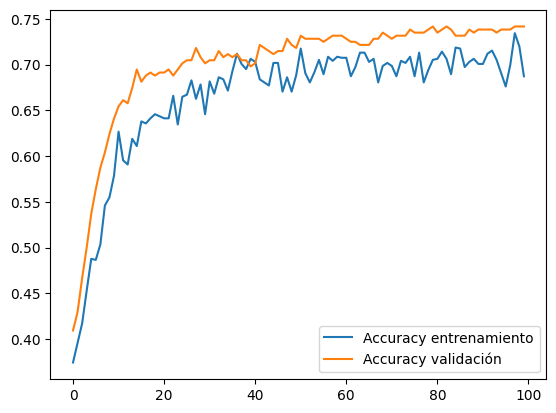

In [45]:
red = Sequential()

# Primera capa
red.add(Conv1D(filters= 100, kernel_size= 2, activation= 'relu', input_shape = (x_train.shape[1], x_train.shape[2])))
red.add(Dropout(0.1))

# Segunda capa
red.add(LSTM(units = 100, return_sequences = False))
red.add(Dropout(0.1))
red.add(Dense(units = 4,activation = 'softmax'))

# Compilación de la red
red.compile(optimizer = 'adam',loss='CategoricalCrossentropy',metrics = ['accuracy'])

# Optimización del modelo
Early_Stopping = EarlyStopping(monitor='val_loss',patience=15, verbose=1,restore_best_weights=True)

# Entrenamiento de la red
historial = red.fit(x_train,y_train,epochs = 100, batch_size = 40, validation_data=(x_test,y_test),callbacks = [Early_Stopping])

# Predicción
y_pred = red.predict(x_test)

# Evaluación del modelo
perdida, accuracy = red.evaluate(x_test,y_test)
print(f'Pérdida del conjunto de test: {perdida}')
print(f'Accuracy del conjunto de test: {accuracy}')

# Visualización de los resultados
plt.plot(historial.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Accuracy validación')
plt.legend()
plt.show()

In [46]:
# Matriz de confusión
# Discretizaar los valores por filas
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

# Sensibilidad
sensibilidad = Sensibilidad(matriz_confusion)
print(f'Sensibilidad: {round(sensibilidad,4)}')
# Especificidad
especificidad = Especificidad(matriz_confusion)
print(f'Especificidad: {round(especificidad,4)}')

Matriz de confusión:
[[50  8 16  3]
 [ 7 46  8  1]
 [23  5 52  1]
 [ 3  1  1 73]]
Sensibilidad: 0.7416
Especificidad: 0.9139


Combinando con  la red CNN empeora significativamente le accuracy.

## CNN

In [47]:
ventana = 10
x = []
y = []
for i in range(ventana,len(X)):
  x.append(X[i-ventana:i,:])
  y.append(Y[i])

# Conversión de x e y en arrays de numpy para que la red neuronal los coja correctamente.
x,y = np.array(x), np.array(y)

# Categorizar la variable objetivo
y = to_categorical(y, num_classes=4)

# División en conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 0)

Epoch 1/100


c:\Users\sonia\OneDrive\Documentos\ESCRITORIO\3. MASTER\1. TFM\TFM\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2983 - loss: 1.3692 - val_accuracy: 0.3758 - val_loss: 1.3411
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3599 - loss: 1.3442 - val_accuracy: 0.4329 - val_loss: 1.3143
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4654 - loss: 1.3171 - val_accuracy: 0.4765 - val_loss: 1.2894
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4646 - loss: 1.3044 - val_accuracy: 0.5403 - val_loss: 1.2649
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4909 - loss: 1.2788 - val_accuracy: 0.5369 - val_loss: 1.2418
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5326 - loss: 1.2612 - val_accuracy: 0.5537 - val_loss: 1.2214
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5025 - loss: 1.2537 - val_accuracy: 0.5839 - val_loss: 1.2013
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5053 - loss: 1.2381 - val_accuracy: 0.5973 - val_loss: 1.

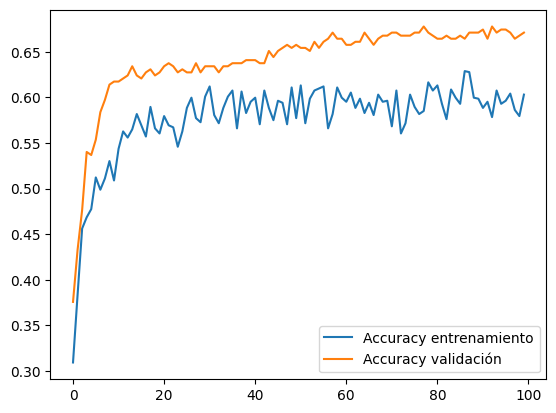

In [48]:
# Creación de la red CNN
CNN = Sequential()

# Primera capa convolux¡cional
CNN.add(Conv1D(filters= 100, kernel_size= 2, activation= 'relu', input_shape = (x_train.shape[1], x_train.shape[2])))
CNN.add(Dropout(0.1))

# Segunda capa convolucional
CNN.add(Conv1D(filters= 100, kernel_size= 2, activation= 'relu'))
CNN.add(Dropout(0.1))

# Capa de salida
CNN.add(Conv1D(filters= 100, kernel_size= 2, activation= 'softmax'))
CNN.add(Dropout(0.1))

# Aplanamiento
CNN.add(Flatten())

# Capa de salida
CNN.add(Dense(units = 4,activation = 'softmax'))

# Compilación de la red
CNN.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

# Optimización del modelo
Early_Stopping = EarlyStopping(monitor='val_loss',patience=15, verbose=1,restore_best_weights=True)

# Entrenamiento de la red
historial = CNN.fit(x_train,y_train,epochs = 100, batch_size = 40, validation_data=(x_test,y_test),callbacks = [Early_Stopping])

# Predicción
y_pred = CNN.predict(x_test)

# Evaluación del modelo
perdida, accuracy = CNN.evaluate(x_test,y_test)
print(f'Pérdida del conjunto de test: {perdida}')
print(f'Accuracy del conjunto de test: {accuracy}')

# Visualización de los resultados
plt.plot(historial.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Accuracy validación')
plt.legend()
plt.show()

In [49]:
# Matriz de confusión
# Discretizaar los valores por filas
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
matriz_confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(matriz_confusion)

# Sensibilidad
sensibilidad = Sensibilidad(matriz_confusion)
print(f'Sensibilidad: {round(sensibilidad,4)}')
especificidad = Especificidad(matriz_confusion)
print(f'Especificidad: {round(especificidad,4)}')

Matriz de confusión:
[[56 13  6  2]
 [20 32 10  0]
 [25  9 45  2]
 [ 6  3  2 67]]
Sensibilidad: 0.6711
Especificidad: 0.8904
